# Multivariate Linear Regression

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge

Last Update 3/22/2022

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

## Acknowledgement

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/)*

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Fitting and Quality

## Fit a hyperplane to N-D data

Univariate linear regression can easily be extended to include multiple features, which is called **multivariate linear regression**.  Instead of using a single variable to make a prediction, we use a vector of variables:

$$
\hat{y} = w_1x_1 + \ldots + w_dx_d + b = \mathbf{w}^\top \mathbf{x} + b
$$

Each $x_i$ represents a different feature, and each feature has its own parameter.  In our advertising data for example, $\mathbf{x} = (x_1,x_2, x_3)^\top$.
As in the univariate case, the parameters are chosen to minimize the sum-squared error:
$$
J( \mathbf{w},b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$
where 
$$
\hat{y}_i = \mathbf{w}^\top \mathbf{x}_i + b.
$$
But keep in mind that there are three coefficients included in $\mathbf{w}$, one for each of our features. For example using the advertising sales data we would have:
$$
\mathbf{w} = \begin{bmatrix} w_{TV} \\ w_{Radio} \\ w_{Newspaper} \end{bmatrix} 
$$

## Evaluation metrics for regression problems

We just introduced the concept of fitting a multivariate linear model, let us now take a moment to ask what it might mean to judge the qaulity of a model after fitting.

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Let's create some example numeric predictions, and calculate common evaluation metrics for regression problems:

In [ ]:
# define true and predicted response values
y = np.array([100, 50, 30, 20])
y_pred = np.array([90, 50, 50, 30])

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1N\sum_{i=1}^N |y_i-\hat{y}_i|$$

In [ ]:
from sklearn import metrics

print(f"Mean Absolute Error is : {metrics.mean_absolute_error(y, y_pred):6.3f}")

Mean Absolute Error is : 10.000


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1N\sum_{i=1}^N(y_i-\hat{y}_i)^2$$

In [ ]:
print(f"Mean Squared Error is : {metrics.mean_squared_error(y, y_pred):6.3f}")

Mean Squared Error is : 150.000


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1N\sum_{i=1}^N(y_i-\hat{y}_i)^2}$$

In [ ]:
print(f"RMSE is : {np.sqrt(metrics.mean_squared_error(y, y_pred)):6.3f}")

RMSE is : 12.247


**Coefficient of Determination** ($R^{2}$) is a measure of how much variance in the data is explained by the model. Now, having given you this simple English sentence, keep in mind this measure is arguably both more useful and more complicated to understand. You probably should review both the [Wikipedia Page](https://en.wikipedia.org/wiki/Coefficient_of_determination) and the SKLearn documentation on the [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). The formalism from Wikipedia offers an concise definition:

$$
R^{2} = 1 - \frac{SS_{\hbox{res}}}{SS_{\hbox{tot}}}
$$

$$ 
SS_{\hbox{res}} = \sum_{i} \left( y_{i} - f_{i} \right)^{2} \;\;\;\;\;\;
SS_{\hbox{tot}} = \sum_{i} \left( y_{i} - \bar{y} \right)^{2} 
$$

where $f_{i}$ is the $i$ prediction from our linear regression model.


In [ ]:
print(f"R2 is : {r2_score(y, y_pred):4.2f}")

R2 is : 0.84


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** "punishes" larger errors
- **RMSE** easier to understand because RMSE is in the "y" units.
- **R2** a more general measure indicating amount observations are "explained" by features.

The first three are measures of error or loss, because lower is better. 

The R2 measure is **not** an error. Instead, it typically ranges between $0$ and $1$ with zero implying the model explains nothing and $1$ implying the model perfectly explains the obervations (data).

Here's an example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
# same true values as above
y_true = np.array([100, 50, 30, 20])

# new set of predicted values
y_pred = np.array([60, 50, 30, 20])

# the previous values were:  y_pred = [90, 50, 50, 30]

# MAE is the same as before
print(f"MAE is  : {metrics.mean_absolute_error(y, y_pred):6.3f}")

# RMSE is larger than before
print(f"RMSE is : {np.sqrt(metrics.mean_squared_error(y, y_pred)):6.3f}")

MAE is  : 10.000
RMSE is : 20.000


# Part 2: Multivariate Regression on Advertising Data

Again the advertising data will be useful for illsturation.  Here, unlike before, we will consider by linear regression on one variable at a time (Marginal) versus a multivariate linear regression.

In [ ]:
# read data into a pandas DataFrame
data = pd.read_csv('datasets/Advertising.csv', index_col=0)

data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [ ]:
Xall = data[['TV', 'Radio', 'Newspaper']].values
y    = data['Sales'].values

linreg = LinearRegression(); linreg.fit(Xall, y)
y_pred = linreg.predict(Xall)

# The following is a handy way to reduce printed precision 
np.set_printoptions(precision=4)

print(f'Coefficients {linreg.coef_}, Intercept {linreg.intercept_:5.2f}' )
y_pred_all = y_pred

Coefficients [ 0.0458  0.1885 -0.001 ], Intercept  2.94


For a given amount of Radio and Newspaper spending, an increase of $1000 in **TV** spending is associated with an **increase in Sales of 45.8 widgets**.

For a given amount of TV and Newspaper spending, an increase of $1000 in **Radio** spending is associated with an **increase in Sales of 188.5 widgets**.

For a given amount of TV and Radio spending, an increase of $1000 in **Newspaper** spending is associated with a **decrease in Sales of 1.0 widgets**. 

The first two results are not surprising - but the last - is very interesting. How could it be that advertising in a **Newpaper** reduces sales? And please avoid the temptation to leap to superficial answers to this question - what is going on here happens often in data science and the answers require thought and work. Let us first back away from the quesiton of **Newpaper** advertising being a bad idea and starte on more solid ground: how good is our overall model?

In [ ]:
print(f"The R2 Statistic using all three featrues: {r2_score(y, y_pred_all):4.2f}")

The R2 Statistic using all three featrues: 0.90


## Single Versus Multiple 

What happens if we go back and consider just `Newspaper` as a (linear) predictor of `Sales`?

### Newspaper Advertising Alone

Coefficient 0.055, Intercept 12.35


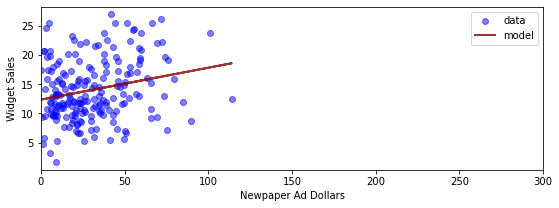

In [ ]:
Xnews = data[['Newspaper']].values; y = data['Sales'].values
linreg = LinearRegression(); linreg.fit(Xnews, y)
y_pred = linreg.predict(Xnews)
print(f'Coefficient {linreg.coef_[0]:5.3f}, Intercept {linreg.intercept_:5.2f}')

def plotOneVar (X, y, ypred, xlab) :
    plt.figure(figsize=(9, 3))
    plt.xlim(right=300)
    plt.scatter(X, y,  color='blue', alpha=0.5, label = 'data')
    plt.plot(X, y_pred, color='darkred', alpha=0.8,linewidth=2, label = 'model')
    plt.xlabel('{sa} Ad Dollars'.format(sa=xlab))
    plt.ylabel("Widget Sales")
    plt.legend(loc="best");

plotOneVar(Xnews, y, y_pred, "Newpaper")  
y_pred_news = y_pred ;

In [ ]:
print(f"The R2 Statistic for Newspaper Alone: {r2_score(y, y_pred_news):4.2f}")

The R2 Statistic for Newspaper Alone: 0.05


What we see is that if all we know about is the pairing between Newspaper advertising dollars spent and Widget Sales we will conclude more dollars spent on advertising relates to more widgets sold.  But hold that thought while we do the same thing for Radio and TV.

### Radio Advertising Alone

Now consider `Radio` alone as a predictor

Coefficient 0.202, Intercept  9.31


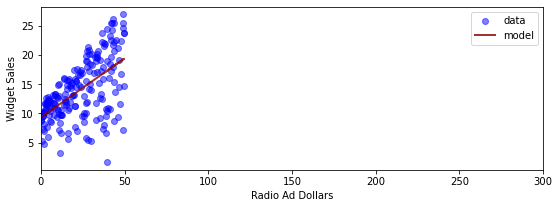

In [ ]:
Xradio = data[['Radio']].values; y     = data['Sales'].values
linreg = LinearRegression(); linreg.fit(Xradio, y)
y_pred = linreg.predict(Xradio)

print(f'Coefficient {linreg.coef_[0]:5.3f}, Intercept {linreg.intercept_:5.2f}')

plotOneVar(Xradio, y, y_pred, "Radio")    
y_pred_radio = y_pred

This is a good time to draw you attention to the odd decision to plot out to 300 (Thousand) dollars in advertising sales. This is done so that our plots can be directly compared when moving to TV (which we do next)

In [ ]:
print(f"The R2 Statistic for Radio Alone: {r2_score(y, y_pred_radio):4.2f}")

The R2 Statistic for Radio Alone: 0.33


### TV Advertising Alone

Coefficient 0.048, Intercept  7.03


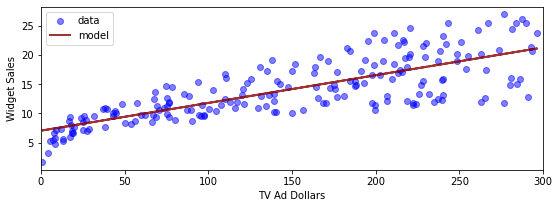

In [ ]:
Xtv = data[['TV']].values; y = data['Sales'].values
linreg = LinearRegression(); linreg.fit(Xtv, y)
y_pred = linreg.predict(Xtv)

print(f'Coefficient {linreg.coef_[0]:5.3f}, Intercept {linreg.intercept_:5.2f}')

plotOneVar(Xtv, y, y_pred, "TV")    
y_pred_tv = y_pred;

In [ ]:
print(f"The R2 Statistic for Radio Alone: {r2_score(y, y_pred_tv):6.3f}")

The R2 Statistic for Radio Alone:  0.612


## How To Interpret

We have jumped into an  important and also non-trivial aspect of data analysis.  

Asking how one variable predicts another is sometimes called marginal analysis and it is easy to understand. However, even this simple three variable problem illustrates the risks. Seldom in life do variables come to us cleanly seperated. So, who do we begin to ask about interactions?  You have already glimpsed a part of the answer: look what happened to the perceived important of Newspaper advertising when consider in context with the other two. To be more precise, the coefficient associated with how much sales grow in proportion to Newspaper advertising dollars dropped to essentiall zero when evaluated **in combination with** Radio and TV.

While it may be a touch hard to swallow at first, these two outcomes our not in conflict - or at least it is important to understand that each model we apply is doing what it is designed to do.  

Marginal analysis is generally considered weaker than mutlivariate analysis precisely because multivariate analysis can - and will - surface interactions between combinations of variables. To put what we are seeing into an arguably too simplistic sentence ...


> The apparent widget sale gains ascribed to Newspaper advertising in the single variable model disappears because that increase in widget sales is being (better?) explained by a combination of TV and Radio advertising.

# Advantages/disadvantages of linear regression

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required 
- Can perform well with a small number of observations

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the labels
- Performance is (generally) not competitive with the best regression methods
- Can be sensitive to irrelevant features and outliers

Linear regression is a **parametric method**, meaning that success depends on the data satisfying our assumption that the data fall on a line/hyperplane.